# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression
# https://docs.google.com/presentation/d/1NfC05Wi6sAkbS9U4X6RW9jyW5auU901wPTRAtopw9qA/edit?usp=drive_link

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 350 (delta 54), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (350/350), 42.64 MiB | 7.79 MiB/s, done.
Resolving deltas: 100% (177/177), done.
/content/machine_learning_1/linear_regression


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


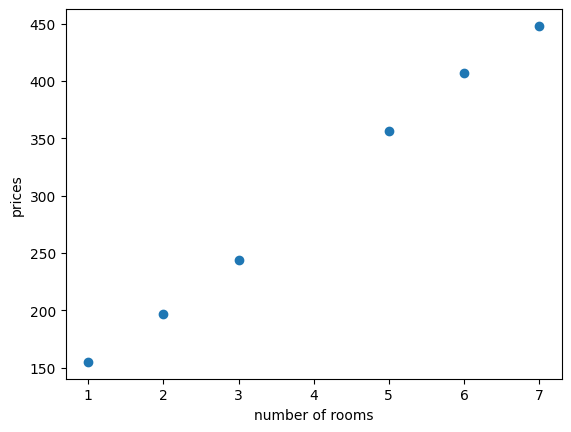

In [4]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [6]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price



In [ ]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price

    return price_per_room, base_price

In [7]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room * num_rooms

    error = price - predicted_price

    base_price = base_price + learning_rate * error

    price_per_room = price_per_room + learning_rate * num_rooms * error

    return price_per_room, base_price

In [8]:
base_price = 100.0
price_per_room = 50.0
num_rooms = 3
price = 280

learning_rate = 0.01

new_price_per_room, new_base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate)

print("Price per room (slope(m)):", new_price_per_room)
print("Base price (bias(b)):", new_base_price)

Price per room (slope(m)): 50.9
Base price (bias(b)): 100.3


In [ ]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price

    return price_per_room, base_price

In [19]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room * num_rooms
    error = price - predicted_price

    if error > 0:
        sign_error = 1
    elif error < 0:
        sign_error = -1
    else:
        sign_error = 0

    base_price = base_price + learning_rate * sign_error
    price_per_room = price_per_room + learning_rate * num_rooms * sign_error

    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

1st
Epoch    0: Loss = 328036.3832, m = 18.3954, b = 4.2682
Epoch  100: Loss = 6577.1984, m = 63.7519, b = 30.7011
Epoch  200: Loss = 3895.1218, m = 61.3708, b = 47.7865
Epoch  300: Loss = 2648.9924, m = 57.9136, b = 57.1378
Epoch  400: Loss = 1643.5124, m = 57.0178, b = 66.4111
Epoch  500: Loss = 1069.3517, m = 55.9358, b = 74.1943
Epoch  600: Loss = 797.6316, m = 55.1227, b = 78.6461
Epoch  700: Loss = 534.9269, m = 54.0276, b = 83.3005
Epoch  800: Loss = 355.1865, m = 52.6851, b = 87.2234
Epoch  900: Loss = 300.0422, m = 51.9414, b = 89.6067
Epoch  999: Loss = 333.0281, m = 51.0443, b = 91.5945
Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

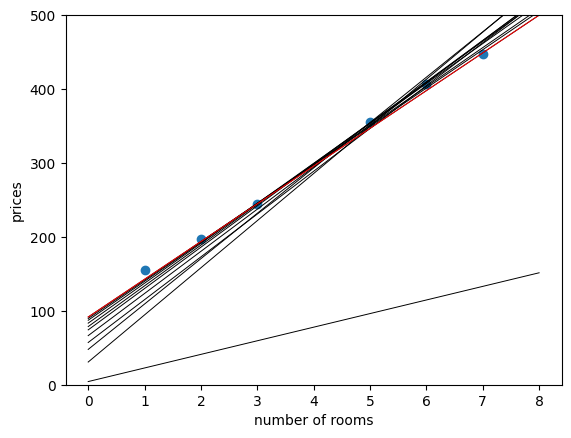

In [38]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
    for epoch in range(epochs):
        idx = random.randint(0, len(features)-1)
        sample_feature = features[idx]
        sample_label = labels[idx]
        price_per_room, base_price = square_trick(base_price, price_per_room, sample_feature, sample_label, learning_rate)
        #price_per_room, base_price = absolute_trick(base_price, price_per_room, sample_feature, sample_label, learning_rate)
        if epoch % 100 == 0 or epoch == 999:
            if epoch == 0:
               print("1st")
            loss = np.sum((labels - (price_per_room * features + base_price))**2)
            print(f"Epoch {epoch:4d}: Loss = {loss:.4f}, m = {price_per_room:.4f}, b = {base_price:.4f}")
            utils.draw_line(price_per_room, base_price, 'black')

    utils.draw_line(price_per_room, base_price, 'red')
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

Streaming output truncated to the last 5000 lines.
Epoch 5002: Loss = 6765.6498, m = 63.5244, b = 29.7880
Epoch 5003: Loss = 6765.6498, m = 63.5744, b = 29.7980
Epoch 5004: Loss = 6765.6498, m = 63.5144, b = 29.7880
Epoch 5005: Loss = 6765.6498, m = 63.4444, b = 29.7780
Epoch 5006: Loss = 6765.6498, m = 63.4644, b = 29.7880
Epoch 5007: Loss = 6765.6498, m = 63.5144, b = 29.7980
Epoch 5008: Loss = 6765.6498, m = 63.5444, b = 29.8080
Epoch 5009: Loss = 6765.6498, m = 63.5644, b = 29.8180
Epoch 5010: Loss = 6765.6498, m = 63.4944, b = 29.8080
Epoch 5011: Loss = 6765.6498, m = 63.4344, b = 29.7980
Epoch 5012: Loss = 6765.6498, m = 63.4644, b = 29.8080
Epoch 5013: Loss = 6765.6498, m = 63.4044, b = 29.7980
Epoch 5014: Loss = 6765.6498, m = 63.4244, b = 29.8080
Epoch 5015: Loss = 6765.6498, m = 63.4344, b = 29.8180
Epoch 5016: Loss = 6765.6498, m = 63.4444, b = 29.8280
Epoch 5017: Loss = 6765.6498, m = 63.4644, b = 29.8380
Epoch 5018: Loss = 6765.6498, m = 63.4744, b = 29.8480
Epoch 5019: Lo

(59.764421851523906, 48.77795440293917)

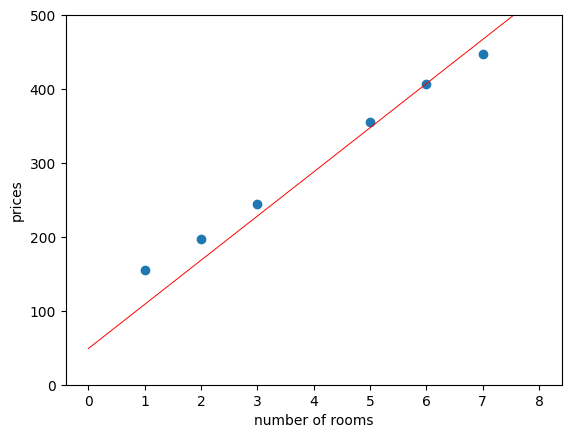

In [27]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    for epoch in range(epochs):
        idx = random.randint(0, len(features)-1)
        sample_feature = features[idx]
        sample_label = labels[idx]
        #price_per_room, base_price = square_trick(base_price, price_per_room, sample_feature, sample_label, learning_rate)
        price_per_room, base_price = absolute_trick(base_price, price_per_room, sample_feature, sample_label, learning_rate)
       # if epoch % 100 == 0:
        #    loss = np.sum((labels - (price_per_room * features + base_price))**2)
        #print(f"Epoch {epoch:4d}: Loss = {loss:.4f}, m = {price_per_room:.4f}, b = {base_price:.4f}")
    utils.draw_line(price_per_room, base_price, 'red', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Root mean squared error function

In [ ]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions

    return error

### Plotting the error function

In [ ]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [ ]:
from sklearn.linear_model import SGDRegressor
## TODO ##
# Use sklearn to implement linear regression (SGDRegressor) that fit our data (features, labels)
# set tol = None
# Tune alpha and max_iter

In [ ]:
## TODO ##
# print the coefficients and bias of this model


In [ ]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms


### Normal Equation



In [ ]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features

    return W

W = Normal_Equation(features,labels)
print(W)

### Real Example (Predict fuel efficiency)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Get data

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.head()

#### Clean data

In [ ]:
dataset.isna().sum()

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

In [ ]:
dataset.head()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
dataset.head()

In [ ]:
sns.pairplot(dataset[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']])

In [ ]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [ ]:
from sklearn.linear_model import SGDRegressor

# use single-variable input to fit linear regression model
# set tol = None
# Tune alpha and max_iter
# print the score and the mse error

In [ ]:
from sklearn.linear_model import SGDRegressor

# use multi-variable input to fit linear regression model
# set tol = None
# Tune alpha and max_iter
# print the score and the mse error

In [ ]:
from sklearn.linear_model import SGDRegressor

# use Normalized mlti-variable input to fit linear regression model
# set tol = None
# Tune alpha and max_iter
# use sklearn.preprocessing.StandardScaler for normalization
# print the score and the mse error